In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False

In [19]:
files = {
    '杭州': '浙江杭州-2024-11.xlsx',
    '临安市': '浙江杭州临安-2024-11.xlsx',
    '余杭区': '浙江杭州余杭-2024-11.xlsx',
    '建德市': '浙江杭州建德-2024-11.xlsx',
    '桐庐县': '浙江杭州桐庐-2024-11.xlsx',
    '淳安县': '浙江杭州淳安-2024-11.xlsx'
}

all_data = pd.DataFrame()
for region, file in files.items():
    try:
        data = pd.read_excel(file)
        data['地区'] = region
        all_data = pd.concat([all_data, data], ignore_index=True)
    except Exception as e:
        print(f"读取 {file} 时出错：{e}")

all_data['时间'] = pd.to_datetime(all_data['时间'])
all_data['日期'] = all_data['时间'].dt.date
all_data['降水量'] = all_data['降水量'].str.replace('mm', '').astype(float)
all_data['风力'] = all_data['风力'].str.replace('级', '').astype(int)
all_data['湿度'] = all_data['湿度'].str.replace('%', '').astype(int)
all_data['能见度'] = all_data['能见度'].str.replace('km','').astype(int)
daily_rainfall = all_data.groupby(['日期','地区'])['降水量'].sum().reset_index()

In [20]:
all_data

,地区,时间,天气,温度,降水量,风向,风力,风速,风向角度,气压,湿度,空气质量,能见度,日期
0,杭州,2024-11-01 00:00:00,小雨,17.8,3.5,北风,3,17km/h,348.0,1009hPa,99,22,11,2024-11-01
1,杭州,2024-11-01 01:00:00,小雨,17.6,3.6,北风,3,18km/h,344.0,1008hPa,99,22,15,2024-11-01
2,杭州,2024-11-01 02:00:00,中雨,17.7,2.9,北风,4,23km/h,346.0,1008hPa,98,25,9,2024-11-01
3,杭州,2024-11-01 03:00:00,中雨,17.5,4.8,北风,4,23km/h,349.0,1008hPa,98,26,11,2024-11-01
4,杭州,2024-11-01 04:00:00,大雨,17.4,2.3,北风,4,24km/h,351.0,1007hPa,98,26,13,2024-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,淳安县,2024-11-30 19:00:00,晴,11.9,0.0,东南风,1,1km/h,137.0,996hPa,62,59,22,2024-11-30
4316,淳安县,2024-11-30 20:00:00,晴,11.5,0.0,东北风,1,3km/h,42.0,997hPa,65,69,26,2024-11-30
4317,淳安县,2024-11-30 21:00:00,晴,10.6,0.0,东南风,1,3km/h,134.0,997hPa,70,64,26,2024-11-30
4318,淳安县,2024-11-30 22:00:00,晴,10.2,0.0,东南风,1,2km/h,132.0,997hPa,74,61,25,2024-11-30


In [21]:
weather_counts = all_data[all_data['地区'] == '杭州']['天气'].value_counts();weather_counts

天气
晴     221
阴     169
多云    158
霾      94
雾      43
中雨     13
小雨     12
雨       8
大雨      2
Name: count, dtype: int64

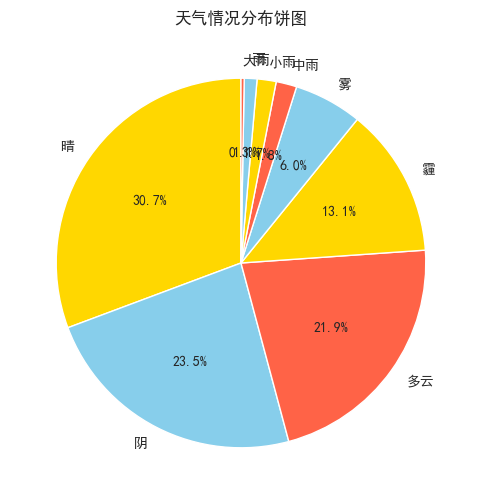

In [22]:
plt.figure(figsize=(6, 6))
plt.pie(
    weather_counts,
    labels=weather_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FFD700', '#87CEEB', '#FF6347']
)
plt.title('天气情况分布饼图')
plt.show()


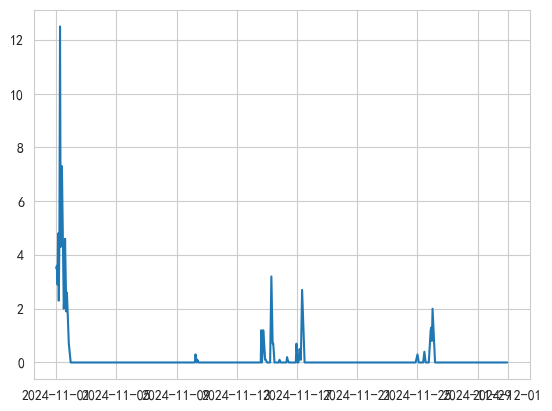

In [23]:
hangzhou_data = all_data[(all_data['地区'] == '杭州')]
plt.plot(hangzhou_data.时间,hangzhou_data.降水量)

<Axes: >

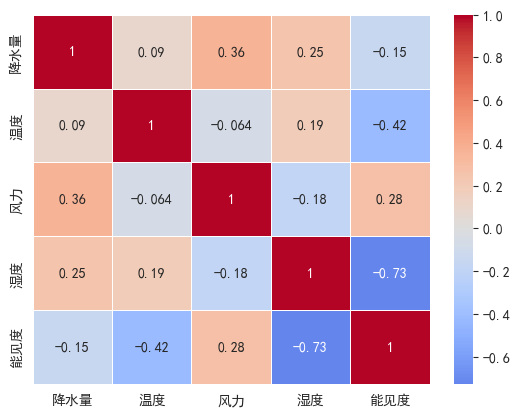

In [24]:
df = hangzhou_data[['降水量','温度','风力','湿度','能见度']]
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

In [25]:
weathercount = hangzhou_data.groupby('日期')['天气'].value_counts()
weathercount = weathercount.reset_index()
print('全天为晴的天数：',weathercount[weathercount.天气 == '晴']['count'].eq(24).sum())
print('大雨天数:',weathercount[weathercount.天气 == '大雨']['count'].ne(0).sum())


全天为晴的天数： 4
大雨天数: 1


In [26]:
daily_rainfall

,日期,地区,降水量
0,2024-11-01,临安市,24.9
1,2024-11-01,余杭区,53.6
2,2024-11-01,建德市,23.6
3,2024-11-01,杭州,78.5
4,2024-11-01,桐庐县,44.5
...,...,...,...
175,2024-11-30,余杭区,0.0
176,2024-11-30,建德市,0.0
177,2024-11-30,杭州,0.0
178,2024-11-30,桐庐县,0.0


In [27]:
from pyecharts.charts import Map, Timeline
from pyecharts import options as opts


timeline = Timeline()

dates = daily_rainfall['日期'].unique()

for date in dates:
    date_data = daily_rainfall[daily_rainfall['日期'] == date]
    print(date_data)
    map_chart = Map(init_opts=opts.InitOpts(width="1000px", height="600px"))
    map_chart.add(
        series_name=f"降水量 - {date}",
        data_pair=[(row['地区'], row['降水量']) for _, row in date_data.iterrows()],
        maptype="杭州",
        is_map_symbol_show=False
    )

    map_chart.set_global_opts(
        title_opts=opts.TitleOpts(title=f"杭州地区每日降水分布 - {date}"),
        visualmap_opts=opts.VisualMapOpts(min_=0, max_=80),
    )

    timeline.add(map_chart, time_point=date)

timeline.add_schema(
    play_interval=1000,
    is_auto_play=True,
    is_loop_play=False
)


timeline.render("杭州地区每日降水分布时间轴填充地图.html")

           日期   地区   降水量
0  2024-11-01  临安市  24.9
1  2024-11-01  余杭区  53.6
2  2024-11-01  建德市  23.6
3  2024-11-01   杭州  78.5
4  2024-11-01  桐庐县  44.5
5  2024-11-01  淳安县  10.8
            日期   地区  降水量
6   2024-11-02  临安市  0.0
7   2024-11-02  余杭区  0.0
8   2024-11-02  建德市  0.0
9   2024-11-02   杭州  0.0
10  2024-11-02  桐庐县  0.0
11  2024-11-02  淳安县  0.0
            日期   地区  降水量
12  2024-11-03  临安市  0.0
13  2024-11-03  余杭区  0.0
14  2024-11-03  建德市  0.0
15  2024-11-03   杭州  0.0
16  2024-11-03  桐庐县  0.0
17  2024-11-03  淳安县  0.0
            日期   地区  降水量
18  2024-11-04  临安市  0.0
19  2024-11-04  余杭区  0.0
20  2024-11-04  建德市  0.0
21  2024-11-04   杭州  0.0
22  2024-11-04  桐庐县  0.0
23  2024-11-04  淳安县  0.0
            日期   地区  降水量
24  2024-11-05  临安市  0.0
25  2024-11-05  余杭区  0.0
26  2024-11-05  建德市  0.0
27  2024-11-05   杭州  0.0
28  2024-11-05  桐庐县  0.0
29  2024-11-05  淳安县  0.0
            日期   地区  降水量
30  2024-11-06  临安市  0.0
31  2024-11-06  余杭区  0.0
32  2024-11-06  建德市  0.0
33  2024-11-06   杭州  0.0


'C:\\Users\\mengyonghao\\PycharmProjects\\pytorch_projects\\work\\Data_Visualization\\water_view\\杭州地区每日降水分布时间轴填充地图.html'

均方误差 (MSE): 2.8439


C:\Users\mengyonghao\AppData\Local\Temp\ipykernel_35716\2991983230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, '预测值'] = df['降水量'].rolling(window=3, min_periods=1).mean()
C:\Users\mengyonghao\AppData\Local\Temp\ipykernel_35716\2991983230.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, '误差'] = (df['降水量'] - df['预测值']) ** 2


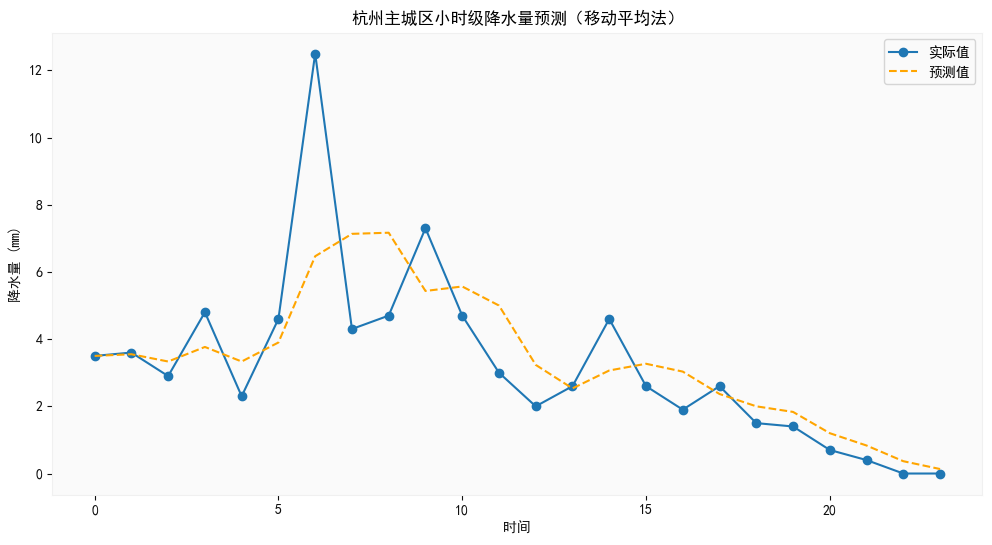

In [32]:
df = hangzhou_data[hangzhou_data['日期'] == pd.Timestamp('2024-11-01').date()]


df.loc[:, '预测值'] = df['降水量'].rolling(window=3, min_periods=1).mean()

# 计算误差
df.loc[:, '误差'] = (df['降水量'] - df['预测值']) ** 2

# 计算均方误差（MSE）
mse = df['误差'].mean()

print(f"均方误差 (MSE): {mse:.4f}")D

# 可视化实际值和预测值
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['降水量'], label='实际值', marker='o')
plt.plot(df.index, df['预测值'], label='预测值', linestyle='--', color='orange')
plt.title('杭州主城区小时级降水量预测（移动平均法）')
plt.xlabel('时间')
plt.ylabel('降水量 (mm)')
plt.legend()
plt.grid()
plt.show()

均方误差 (MSE): 2.5621


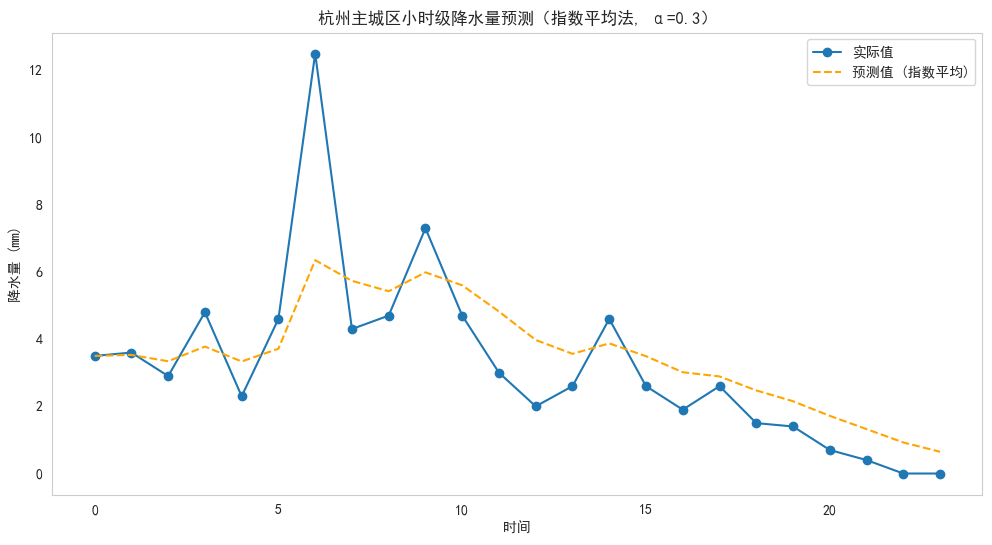

In [29]:
alpha = 0.3
df.loc[:,'预测值'] = df['降水量'].ewm(alpha=alpha, adjust=False).mean()

# 计算误差
df.loc[:,'误差'] = (df['降水量'] - df['预测值']) ** 2

# 计算均方误差（MSE）
mse = df['误差'].mean()

print(f"均方误差 (MSE): {mse:.4f}")

# 可视化实际值和预测值
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['降水量'], label='实际值', marker='o')
plt.plot(df.index, df['预测值'], label='预测值 (指数平均)', linestyle='--', color='orange')
plt.title(f'杭州主城区小时级降水量预测（指数平均法, α={alpha}）')
plt.xlabel('时间')
plt.ylabel('降水量 (mm)')
plt.legend()
plt.grid()
plt.show()

            日期   开盘   收盘    最高   最低
0   2024-11-01  3.5  0.0  12.5  0.0
1   2024-11-02  0.0  0.0   0.0  0.0
2   2024-11-03  0.0  0.0   0.0  0.0
3   2024-11-04  0.0  0.0   0.0  0.0
4   2024-11-05  0.0  0.0   0.0  0.0
5   2024-11-06  0.0  0.0   0.0  0.0
6   2024-11-07  0.0  0.0   0.0  0.0
7   2024-11-08  0.0  0.0   0.0  0.0
8   2024-11-09  0.0  0.0   0.0  0.0
9   2024-11-10  0.0  0.0   0.3  0.0
10  2024-11-11  0.0  0.0   0.0  0.0
11  2024-11-12  0.0  0.0   0.0  0.0
12  2024-11-13  0.0  0.0   0.0  0.0
13  2024-11-14  0.0  0.0   1.2  0.0
14  2024-11-15  0.0  0.0   3.2  0.0
15  2024-11-16  0.0  0.7   0.7  0.0
16  2024-11-17  0.2  0.0   2.7  0.0
17  2024-11-18  0.0  0.0   0.0  0.0
18  2024-11-19  0.0  0.0   0.0  0.0
19  2024-11-20  0.0  0.0   0.0  0.0
20  2024-11-21  0.0  0.0   0.0  0.0
21  2024-11-22  0.0  0.0   0.0  0.0
22  2024-11-23  0.0  0.0   0.0  0.0
23  2024-11-24  0.0  0.1   0.1  0.0
24  2024-11-25  0.3  0.8   1.3  0.0
25  2024-11-26  2.0  0.0   2.0  0.0
26  2024-11-27  0.0  0.0   0

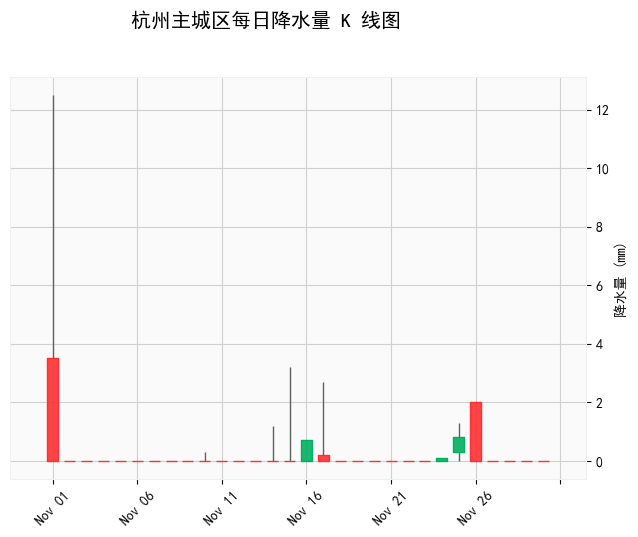

In [30]:
import pandas as pd
import mplfinance as mpf

my_style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.sans-serif': 'SimHei'})
daily_data = all_data[all_data.地区=='杭州'].groupby('日期')['降水量'].agg(
    开盘='first',
    收盘='last',
    最高='max',
    最低='min'
).reset_index()
print(daily_data)

daily_data.rename(columns={'日期': 'Date', '开盘': 'Open', '收盘': 'Close', '最高': 'High', '最低': 'Low'}, inplace=True)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace=True)

mpf.plot(
    daily_data,
    type='candle',
    title='杭州主城区每日降水量 K 线图',
    ylabel='降水量 (mm)',
    style=my_style,  # 图表样式
    volume=False
)


天气
晴     221
阴     169
多云    158
霾      94
雾      43
中雨     13
小雨     12
雨       8
大雨      2
Name: count, dtype: int64


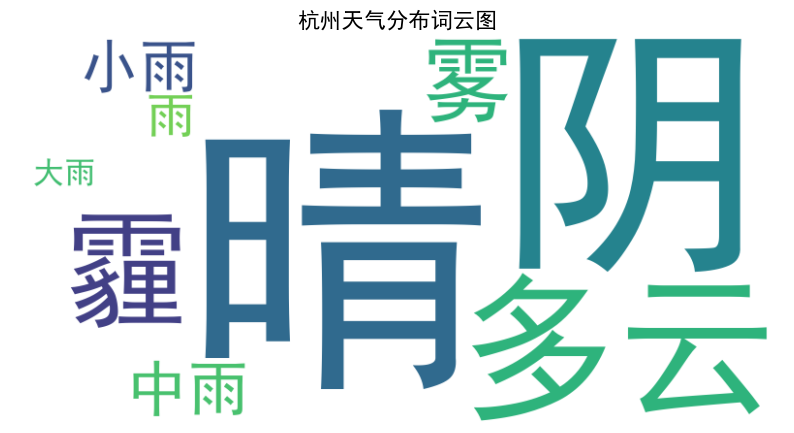

In [31]:

df = all_data[all_data.地区=='杭州']


weather_counts = df['天气'].value_counts()
print(weather_counts)
wordcloud_data = {weather: count for weather, count in zip(weather_counts.index, weather_counts.values)}
wordcloud = WordCloud(
    font_path="C:/Windows/Fonts/simhei.ttf",
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(wordcloud_data)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('杭州天气分布词云图', fontsize=16)
plt.show()
